<a href="https://colab.research.google.com/github/pranjul6386/Covid-kaggle/blob/main/kaggle_resnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/My Drive/kaggle_notebooks/mask.zip"

In [ ]:
import numpy as np
import pandas as pd 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from keras.models import Sequential
import cv2
import random as rand
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
def generate_box(obj):  
    xmin = int(obj.find('xmin').text)
    ymin = int(obj.find('ymin').text)
    xmax = int(obj.find('xmax').text)
    ymax = int(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]
#This function will give label assciated with each label and convert them to numbers
def generate_label(obj):
    if obj.find('name').text == "with_mask":
        return 1
    elif obj.find('name').text == "mask_weared_incorrect":
        return 2
    return 0
#Using in this main function we parse the annotations file and get the objects out from them
# Also we use the above two functions here 
def generate_target(image_id, file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, 'xml')
        objects = soup.find_all('object')

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))
            
        boxes=np.array(boxes)
        labels=np.array(labels)

        img_id = np.array(image_id)
    # Annotation is in dictionary format
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        return (target,num_objs)

In [ ]:
imgs = list(sorted(os.listdir("/content/images")))
len(imgs)

853

In [ ]:
labels = list(sorted(os.listdir("/content/annotations")))

In [ ]:
targets=[]#store coordinates
numobjs=[]#stores number of faces in each image
#run the loop for number of images we have
for i in range(853):
    file_image = 'maksssksksss'+ str(i) + '.png'
    file_label = 'maksssksksss'+ str(i) + '.xml'
    img_path = os.path.join("/content/images/", file_image)
    label_path = os.path.join("/content/annotations/", file_label)
    #Generate Label
    target,numobj = generate_target(i, label_path)
    targets.append(target)
    numobjs.append(numobj)

In [ ]:
face_images=[]
face_labels=[]
for i in range(853):
    img_path = r"/content/images/maksssksksss{}.png".format(i)
    #read image
    img = cv2.imread(img_path)
    for j in range(numobjs[i]):
#       get coordinates of ith image in list 
        locs=(targets[i]['boxes'][j])
#     Get the face from the image using the coordinates
#the arguments are as ymin , ymax and xmin xmax
        img1=img[locs[1]:locs[3],locs[0]:locs[2]]
        img1 = cv2.resize(img1, (224, 224))
        img1 = img_to_array(img1)
        face_images.append(img1)
        face_labels.append(targets[i]['labels'][j])

face_images= np.array(face_images, dtype="float32")
face_labels = np.array(face_labels)

In [ ]:
face_images.shape

(4072, 224, 224, 3)

In [ ]:
face_labels.shape

(4072,)

# Finetuning-resnets50


In [ ]:
from tensorflow.keras.applications import ResNet50

base_model_new = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")
for layer in base_model.layers:
    layer.trainable = False
base_model_new = Sequential()
base_model_new.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model_new.add(Dense(1024,activation="relu"))
base_model_new.add(Dense(512,activation="relu"))
base_model_new.add(Dense(1, activation='sigmoid'))
base_model_new.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])
history=model.fit(face_images,face_labels,batch_size=32, epochs=50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


TypeError: ignored

# fEATURE EXTRACTION USING RESNET50

In [ ]:
import time
import numpy as np
import tensorflow as tf
import tensorflow.keras.applications.resnet50
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
#from tensorflow.python.keras.applications.inception_v3 import preprocess_input
#from tensorflow.python.keras.applications.inception_resnet_v2 import preprocess_input


base_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)




#inceptionv3_weights_path = '../input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
#inceptionresnetv2_weights_path = '../input/keras-pretrained-models/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5'



In [ ]:
t=model.predict(face_images)
print(t.shape)

(4072, 2048)


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(t,face_labels, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain.astype(np.float32))
X_test_scaled = scaler.transform(Xtest.astype(np.float32))

SVM

Running time: 17.8205 seconds
0.950920245398773
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       160
           1       0.95      0.99      0.97       638
           2       1.00      0.24      0.38        17

    accuracy                           0.95       815
   macro avg       0.97      0.70      0.75       815
weighted avg       0.95      0.95      0.95       815



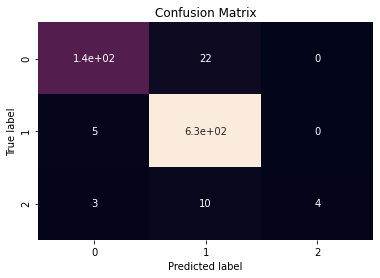

In [ ]:
import time
start = time.time()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import seaborn as sns

clf = SVC(random_state=42)
clf.fit(X_train_scaled, Ytrain)
preds = clf.predict(X_test_scaled)

print('Running time: %.4f seconds' % (time.time()-start))
print(accuracy_score(Ytest, preds))

cm = confusion_matrix(Ytest, preds)
sns.heatmap(cm, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds))

Decision tree


0.9006134969325154
              precision    recall  f1-score   support

           0       0.83      0.72      0.78       160
           1       0.91      0.97      0.94       638
           2       0.00      0.00      0.00        17

    accuracy                           0.90       815
   macro avg       0.58      0.56      0.57       815
weighted avg       0.88      0.90      0.89       815



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


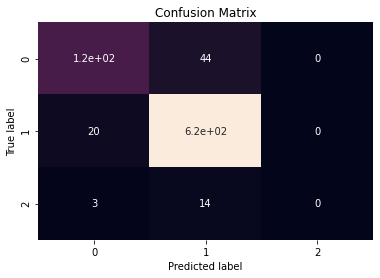

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
clf_des = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf_des.fit(Xtrain, Ytrain)
preds_des=clf_des.predict(Xtest)

print(accuracy_score(Ytest, preds_des))
cm1 = confusion_matrix(Ytest, preds_des)
sns.heatmap(cm1, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_des))

Randomforest

{'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       160
           1       0.93      0.99      0.96       638
           2       0.00      0.00      0.00        17

    accuracy                           0.93       815
   macro avg       0.62      0.59      0.60       815
weighted avg       0.91      0.93      0.92       815



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


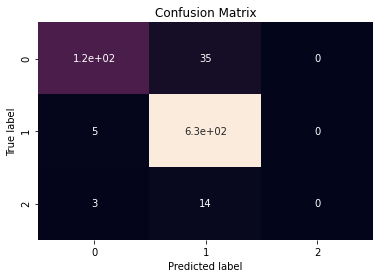

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(Xtrain, Ytrain)

#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)
preds_rf=rf_best.predict(Xtest)
cm4 = confusion_matrix(Ytest, preds_rf)
sns.heatmap(cm4, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_rf))

KNN

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       160
           1       0.95      0.98      0.97       638
           2       1.00      0.29      0.45        17

    accuracy                           0.94       815
   macro avg       0.96      0.71      0.77       815
weighted avg       0.95      0.94      0.94       815



0.9447852760736196

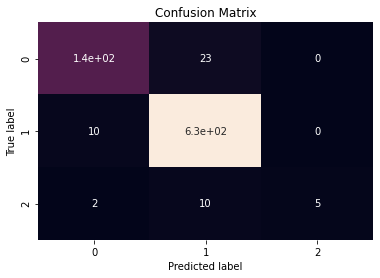

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()#create a dictionary of all values we want to test for n_neighbors

#fit model to training data
knn.fit(Xtrain, Ytrain)
preds_knn=knn.predict(Xtest)
cm6 = confusion_matrix(Ytest, preds_knn)
sns.heatmap(cm6, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_knn))
knn.score(Xtest, Ytest)

Ensemble


              precision    recall  f1-score   support

           0       0.93      0.88      0.90       160
           1       0.95      0.99      0.97       638
           2       1.00      0.06      0.11        17

    accuracy                           0.95       815
   macro avg       0.96      0.64      0.66       815
weighted avg       0.95      0.95      0.94       815

0.947239263803681


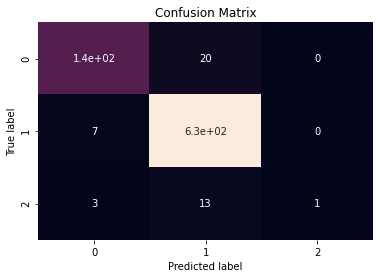

In [ ]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn), ('rf', rf_best), ('svm', clf)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
#fit model to training data
ensemble.fit(Xtrain, Ytrain)
#test our model on the test dat
preds_en=ensemble.predict(Xtest)
cm5 = confusion_matrix(Ytest, preds_en)
sns.heatmap(cm5, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_en))
print(ensemble.score(Xtest, Ytest))

ELM

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classifier beta:
 [[ 2.19661716e-03 -3.41710583e-03  2.93044041e-03]
 [-1.56382328e-03  8.97738763e-03  7.56050699e-04]
 [-1.58145183e-03  2.65691059e-03 -2.88405584e-04]
 [-2.48468507e-03  1.02453406e-02 -1.04285609e-03]
 [-1.98236902e-04  1.73927909e-04  2.03482364e-04]
 [ 2.80100341e-03 -1.00809138e-03  2.74517016e-05]
 [ 1.63313411e-03  1.55597093e-03  2.80924827e-04]
 [-5.36176958e-03  5.87207503e-03  3.56357864e-04]
 [ 5.99795425e-03 -7.61062302e-04 -7.80975462e-04]
 [ 3.68885657e-03  3.13743186e-04  5.19821814e-04]
 [ 7.12061165e-03 -1.25787708e-03 -2.17421478e-04]
 [ 6.53455459e-03 -1.18238406e-02 -6.34763486e-04]
 [ 9.65895730e-03 -5.11289889e-03 -7.60837885e-04]
 [ 2.88626412e-03  2.23325910e-03  1.65197129e-03]
 [ 1.31563960e-02 -1.01604174e-02  4.40143526e-03]
 [-6.61344353e-03  6.59314594e-03  7.35747579e-04]
 [-2.20961053e-03  4.89084867e-03 -1.26235614e-04]
 [-2.13689572e-03  5.72754824e-03  7.62425440e-04]
 [-1.84688901e-03  1.13152369e-02 -1.05729249e-03]
 [ 3.46998846

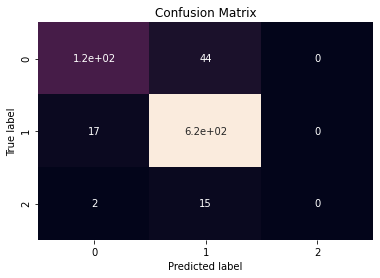

In [ ]:
# Final edited date: 2018.3.7
# Author: Li Xudong, from NSSC.CAS Beijing
# Version: 1.0
# Description: Extreme Learning Machine (ELM) class
# Methods:
#   fit(algorithm)
#   predict(x)
#   score(x, y)
import numpy as np
from scipy.linalg import pinv2, inv
import time

class elm():
    '''
    Function: elm class init
    -------------------
    Parameters:
    shape: list, shape[hidden units, output units]
        numbers of hidden units and output units
    activation_function: str, 'sigmoid', 'relu', 'sin', 'tanh' or 'leaky_relu'
        Activation function of neurals
    x: array, shape[samples, features]
        train data
    y: array, shape[samples, ]
        labels
    C: float
        regularization parameter
    elm_type: str, 'clf' or 'reg'
        'clf' means ELM solve classification problems, 'reg' means ELM solve regression problems.
    one_hot: bool, Ture or False, default True 
        The parameter is useful only when elm_type == 'clf'. If the labels need to transformed to
        one_hot, this parameter is set to be True
    random_type: str, 'uniform' or 'normal', default:'normal'
        Weight initialization method
    '''
    def __init__(self, hidden_units, activation_function,  x, y, C, elm_type, one_hot=True, random_type='normal'):
        self.hidden_units = hidden_units
        self.activation_function = activation_function
        self.random_type = random_type
        self.x = x
        self.y = y
        self.C = C
        self.class_num = np.unique(self.y).shape[0]     
        self.beta = np.zeros((self.hidden_units, self.class_num))   
        self.elm_type = elm_type
        self.one_hot = one_hot

        # if classification problem and one_hot == True
        if elm_type == 'clf' and self.one_hot:
            self.one_hot_label = np.zeros((self.y.shape[0], self.class_num))
            for i in range(self.y.shape[0]):
                self.one_hot_label[i, int(self.y[i])] = 1

        # Randomly generate the weight matrix and bias vector from input to hidden layer
        # 'uniform': uniform distribution
        # 'normal': normal distribution
        if self.random_type == 'uniform':
            self.W = np.random.uniform(low=0, high=1, size=(self.hidden_units, self.x.shape[1]))
            self.b = np.random.uniform(low=0, high=1, size=(self.hidden_units, 1))
        if self.random_type == 'normal':
            self.W = np.random.normal(loc=0, scale=0.5, size=(self.hidden_units, self.x.shape[1]))
            self.b = np.random.normal(loc=0, scale=0.5, size=(self.hidden_units, 1))

    # compute the output of hidden layer according to different activation function
    def __input2hidden(self, x):
        self.temH = np.dot(self.W, x.T) + self.b

        if self.activation_function == 'sigmoid':
            self.H = 1/(1 + np.exp(- self.temH))

        if self.activation_function == 'relu':
            self.H = self.temH * (self.temH > 0)

        if self.activation_function == 'sin':
            self.H = np.sin(self.temH)

        if self.activation_function == 'tanh':
            self.H = (np.exp(self.temH) - np.exp(-self.temH))/(np.exp(self.temH) + np.exp(-self.temH))

        if self.activation_function == 'leaky_relu':
            self.H = np.maximum(0, self.temH) + 0.1 * np.minimum(0, self.temH)

        return self.H

    # compute the output
    def __hidden2output(self, H):
        self.output = np.dot(H.T, self.beta)
        return self.output

    '''
    Function: Train the model, compute beta matrix, the weight matrix from hidden layer to output layer
    ------------------
    Parameter:
    algorithm: str, 'no_re', 'solution1' or 'solution2'
        The algorithm to compute beta matrix
    ------------------
    Return:
    beta: array
        the weight matrix from hidden layer to output layer
    train_score: float
        the accuracy or RMSE
    train_time: str
        time of computing beta
    '''
    def fit(self, algorithm):
        self.time1 = time.clock()   # compute running time
        self.H = self.__input2hidden(self.x)
        if self.elm_type == 'clf':
            if self.one_hot:
                self.y_temp = self.one_hot_label
            else:
                self.y_temp = self.y
        if self.elm_type == 'reg':
            self.y_temp = self.y
        # no regularization
        if algorithm == 'no_re':
            self.beta = np.dot(pinv2(self.H.T), self.y_temp)
        # faster algorithm 1
        if algorithm == 'solution1':
            self.tmp1 = inv(np.eye(self.H.shape[0])/self.C + np.dot(self.H, self.H.T))
            self.tmp2 = np.dot(self.tmp1, self.H)
            self.beta = np.dot(self.tmp2, self.y_temp)
        # faster algorithm 2
        if algorithm == 'solution2':
            self.tmp1 = inv(np.eye(self.H.shape[0])/self.C + np.dot(self.H, self.H.T))
            self.tmp2 = np.dot(self.H.T, self.tmp1)
            self.beta = np.dot(self.tmp2.T, self.y_temp)
        self.time2 = time.clock()

        # compute the results
        self.result = self.__hidden2output(self.H)
        # If the problem if classification problem, the output is softmax
        if self.elm_type == 'clf':
            self.result = np.exp(self.result)/np.sum(np.exp(self.result), axis=1).reshape(-1, 1)

        # Evaluate training results
        # If problem is classification, compute the accuracy
        # If problem is regression, compute the RMSE
        if self.elm_type == 'clf':
            self.y_ = np.where(self.result == np.max(self.result, axis=1).reshape(-1, 1))[1]
            self.correct = 0
            for i in range(self.y.shape[0]):
                if self.y_[i] == self.y[i]:
                    self.correct += 1
            self.train_score = self.correct/self.y.shape[0]
        if self.elm_type == 'reg':
            self.train_score = np.sqrt(np.sum((self.result - self.y) * (self.result - self.y))/self.y.shape[0])
        train_time = str(self.time2 - self.time1)
        return self.beta, self.train_score, train_time

    '''
    Function: compute the result given data
    ---------------
    Parameters:
    x: array, shape[samples, features]
    ---------------
    Return:
    y_: array
        predicted results
    '''
    def predict(self, x):
        self.H = self.__input2hidden(x)
        self.y_ = self.__hidden2output(self.H)
        if self.elm_type == 'clf':
            self.y_ = np.where(self.y_ == np.max(self.y_, axis=1).reshape(-1, 1))[1]

        return self.y_

    '''
    Function: compute accuracy or RMSE given data and labels
    -------------
    Parameters:
    x: array, shape[samples, features]
    y: array, shape[samples, ]
    -------------
    Return:
    test_score: float, accuracy or RMSE
    '''
    def score(self, x, y):
        self.prediction = self.predict(x)
        if self.elm_type == 'clf':
            self.correct = 0
            for i in range(y.shape[0]):
                if self.prediction[i] == y[i]:
                    self.correct += 1
            self.test_score = self.correct/y.shape[0]
        if self.elm_type == 'reg':
            self.test_score = np.sqrt(np.sum((self.result - self.y) * (self.result - self.y))/self.y.shape[0])

        return self.test_score

model = elm(hidden_units=32, activation_function='relu', random_type='normal', x=Xtrain, y=Ytrain, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('solution2')
print("classifier beta:\n", beta)
print("classifier train accuracy:", train_accuracy)
print('classifier running time:', running_time)
prediction = model.predict(Xtest)
print('classifier test accuracy:', model.score(Xtest, Ytest))
preds_elm=model.predict(Xtest)
cm8 = confusion_matrix(Ytest, preds_elm)
sns.heatmap(cm8, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_elm))

